#### Importing libraries and data ####

In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from scipy.stats import chisquare
from scipy.stats import kstest
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='once')
data_red = pd.read_csv(r'C:\Users\DEll\Stats0032-main\Stats0032-main\winequality-red.csv',delimiter=';')
data_white = pd.read_csv(r'C:\Users\DEll\Stats0032-main\Stats0032-main\winequality-white.csv',delimiter=';')


# data_red = pd.read_csv('~/frida_ml_repo/rm_ucl/msc_dsml/intro_to_stat_ds/assignment/data/winequality-red.csv',delimiter=';')
# data_white = pd.read_csv('~/frida_ml_repo/rm_ucl/msc_dsml/intro_to_stat_ds/assignment/data/winequality-white.csv',delimiter=';')

In [2]:
data_red

d:\python3.8.4rc1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Setting masks ####

In [3]:
mask_low_red = (data_red['quality']<=4)
mask_mid_red = ((data_red['quality']>4) & (data_red['quality']<7))
mask_high_red = (data_red['quality']>=7)

mask_low_white = (data_white['quality']<=4)
mask_mid_white = ((data_white['quality']>4) & data_white['quality']<7)
mask_high_white = (data_white['quality']>=7)

d:\python3.8.4rc1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# mask_low_red=data_red.loc[data_red['quality'] <= 4]
# mask_low_red


d:\python3.8.4rc1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.00,4
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.80,4
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.30,4
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10,4
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.20,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1480,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.10,4
1482,7.2,0.580,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.30,4
1484,6.8,0.910,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.90,4
1505,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [75]:
mask_variable=mask_low_red
column_variable='pH'
data_variable=data_red
bin_number=5 # real bin number=bin_number-1
freedegree=2


data_to_use = data_variable[mask_variable]
bin_used = data_to_use[column_variable].quantile(np.linspace(0,1,bin_number)).values
bin_used = np.insert(bin_used,0,-np.inf)
bin_used = np.delete(bin_used,1)
data_to_use['Bin'] = pd.cut(data_to_use[column_variable], bin_used)
print(data_to_use.loc[:,'Bin'].describe())

data_test = data_to_use.groupby('Bin').count()[column_variable]
print(data_test)

count              63
unique              4
top       (3.3, 3.38]
freq               19
Name: Bin, dtype: object
Bin
(-inf, 3.3]    17
(3.3, 3.38]    19
(3.38, 3.5]    13
(3.5, 3.9]     14
Name: pH, dtype: int64


d:\python3.8.4rc1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-75-6073991ddb62>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_use['Bin'] = pd.cut(data_to_use[column_variable], bin_used)


In [67]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 2)
s

array([0.17799951, 0.11087546])

In [73]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

d:\python3.8.4rc1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

#### Defining functions ####

In [49]:
# not include the min value of data

def chisquare_func(mask_variable,column_variable,data_variable,bin_number=5,freedegree=2):
    
    
    # linspace(0,1,bin_number)
    # bin_number = actual bin number -1
    
    data_to_use = data_variable[mask_variable]
    
#     bin_used_data = data_to_use[column_variable].quantile(np.linspace(0,1,bin_number)).values
#     bin_used_data = np.insert(bin_used_data,0,-np.inf)
#     bin_used_data = np.delete(bin_used_data,1)
    bin_used_data = data_to_use[column_variable].quantile(np.linspace(0,1,bin_number)).values
    
    data_to_use['Bin'] = pd.cut(data_to_use[column_variable], bin_used_data)


    
    
    normal_data = np.random.normal(data_to_use[column_variable].mean(),data_to_use[column_variable].std(),len(data_to_use))
    normal_df = pd.DataFrame(normal_data,columns = [column_variable])
    
#     bin_used_normal = data_to_use[column_variable].quantile(np.linspace(0,1,bin_number)).values
#     bin_used_normal = np.insert(bin_used_normal,0,-np.inf)
#     bin_used_normal = np.delete(bin_used_normal,1)
    
    bin_used_normal = normal_df[column_variable].quantile(np.linspace(0,1,bin_number)).values    
    
    normal_df['Bin'] = pd.cut(normal_df[column_variable], bin_used_normal)
    

    
    data_test = data_to_use.groupby('Bin').count()[column_variable]
    normal_test = normal_df.groupby('Bin').count()[column_variable]
    
    print("data_test:",data_test,"\nnormal_test",normal_test)
    
    min_data_test = np.min(data_test.values)
    min_normal_test = np.min(normal_test.values)
    
    
    print(min_data_test,min_normal_test)
    
    max_data_test = np.max(data_test.values)
    max_normal_test = np.max(normal_test.values)
    print(max_data_test,max_normal_test)
    
    statistic , p_value = chisquare(data_test,normal_test,ddof=freedegree) 
    
    print('the min count in a bin is {}'.format(np.min([min_data_test,min_normal_test])))
#     print('the min count in a bin is {}'.format(np.min([min_data_test,min_normal_test])))
    print('the degrees of freedom used is {}'.format(freedegree))
    
    return statistic, p_value

def ks_func(mask_variable,column_variable,data_variable):

    data_to_use = data_variable[mask_variable][column_variable]

    statistic , p_value = kstest(data_to_use,'norm', args=(data_to_use.mean(), data_to_use.std()))   
    
    return statistic, p_value

def compare_plot(mask_variable,column_variable,data_variable):
    
    data_to_use = data_variable[mask_variable][column_variable]

    rvs = np.random.normal(data_to_use.mean(),data_to_use.std(),len(data_to_use))
    
    norm_cdf = scipy.stats.norm.cdf(rvs)
    observed_cdf = scipy.stats.norm.cdf(data_to_use)
    
    sns.lineplot(x=rvs, y=norm_cdf)
    sns.lineplot(x=data_to_use, y=observed_cdf)
    plt.show()

d:\python3.8.4rc1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# include the min value of data

def chisquare_func(mask_variable,column_variable,data_variable,bin_number=5,freedegree=1):

    data_to_use = data_variable[mask_variable]
    
    print(data_to_use.loc[:,'pH'].describe())
    bin_used_data = data_to_use[column_variable].quantile(np.linspace(0,1,bin_number)).values
    bin_used_data = np.insert(bin_used_data,0,-np.inf)
    bin_used_data = np.delete(bin_used_data,1)
#     bin_used_data = data_to_use[column_variable].quantile(np.linspace(0,1,bin_number)).values

    data_to_use['Bin'] = pd.cut(data_to_use[column_variable], bin_used_data)

    
    normal_data = np.random.normal(data_to_use[column_variable].mean(),data_to_use[column_variable].std(),len(data_to_use))
    normal_df = pd.DataFrame(normal_data,columns = [column_variable])
    
#     bin_used_normal = normal_df[column_variable].quantile(np.linspace(0,1,bin_number)).values
    bin_used_normal = normal_df[column_variable].quantile(np.linspace(0,1,bin_number)).values
    bin_used_normal = np.insert(bin_used_normal,0,-np.inf)
    bin_used_normal = np.delete(bin_used_normal,1)
    
    normal_df['Bin'] = pd.cut(normal_df[column_variable],bin_used_normal )

    
    data_test = data_to_use.groupby('Bin').count()[column_variable]
    normal_test = normal_df.groupby('Bin').count()[column_variable]
    
    print("data_test:",data_test,"\nnormal_test",normal_test)
        
    min_data_test = np.min(data_test.values)
    min_normal_test = np.min(normal_test.values)
    
    statistic , p_value = chisquare(data_test,normal_test,ddof=freedegree) 
    
    print('the min count in a bin is {}'.format(np.min([min_data_test,min_normal_test])))
    print('the degrees of freedom used is {}'.format(freedegree))
    
    return statistic, p_value

d:\python3.8.4rc1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
chisquare([17,19,13,14],[19.866,11.03,16.086,15.90],2) 

Power_divergenceResult(statistic=6.991463273479591, pvalue=0.008189937203981318)

#### Examples ####

In [53]:
chisquare_func(mask_variable=mask_low_red,column_variable='pH',data_variable=data_red,bin_number=5,freedegree=2)

count    63.000000
mean      3.384127
std       0.175100
min       2.740000
25%       3.300000
50%       3.380000
75%       3.500000
max       3.900000
Name: pH, dtype: float64
data_test: Bin
(-inf, 3.3]    17
(3.3, 3.38]    19
(3.38, 3.5]    13
(3.5, 3.9]     14
Name: pH, dtype: int64 
normal_test Bin
(-inf, 3.241]     16
(3.241, 3.379]    16
(3.379, 3.471]    15
(3.471, 3.817]    16
Name: pH, dtype: int64
the min count in a bin is 13
the degrees of freedom used is 2


<ipython-input-52-2758ce39e784>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_use['Bin'] = pd.cut(data_to_use[column_variable], bin_used_data)


(1.1416666666666666, 0.2853004277605792)

In [170]:
ks_func(mask_high_red,'pH',data_red)

(0.059607962745335086, 0.407821834485401)

#### Plots for project ####

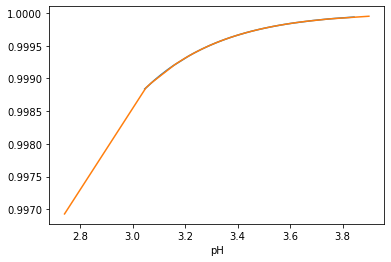

In [172]:
compare_plot(mask_low_red,'pH',data_red)